In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

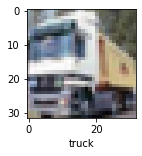

In [ ]:
plot_sample(X_train, y_train, 1)

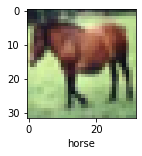

In [ ]:
plot_sample(X_train, y_train, 7)

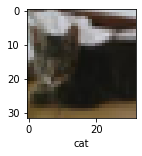

In [ ]:
plot_sample(X_train, y_train, 9)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.8046 - accuracy: 0.3556
Epoch 2/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6192 - accuracy: 0.4283
Epoch 3/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5390 - accuracy: 0.4576
Epoch 4/20
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4796 - accuracy: 0.4762
Epoch 5/20
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4321 - accuracy: 0.4955
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3875 - accuracy: 0.5133
Epoch 7/20
1563/1563 [==============================] - 99s 63ms/step - loss: 1.3490 - accuracy: 0.5253
Epoch 8/20
1563/1563 [==============================] - 99s 64ms/step - loss: 1.3139 - accuracy: 0.5382
Epoch 9/20
1563/1563 [==============================] - 98s 63ms/step - loss: 1.2832 - accuracy: 0.5506
Epoch 10/20
1563/1563 [==============================] - 102

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.55      0.59      1000
           1       0.85      0.35      0.50      1000
           2       0.38      0.51      0.44      1000
           3       0.35      0.40      0.37      1000
           4       0.59      0.36      0.45      1000
           5       0.40      0.53      0.46      1000
           6       0.60      0.60      0.60      1000
           7       0.69      0.54      0.60      1000
           8       0.78      0.55      0.64      1000
           9       0.43      0.80      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.57      0.52      0.52     10000
weighted avg       0.57      0.52      0.52     10000



In [ ]:
ann.evaluate(X_train,y_train)

1563/1563 [==============================] - 41s 26ms/step - loss: 1.0007 - accuracy: 0.6510


[1.0006773471832275, 0.6510400176048279]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=98, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3137 - accuracy: 0.1000


[2.3137266635894775, 0.10000000149011612]

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5428 - accuracy: 0.4336
Epoch 2/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1611 - accuracy: 0.5870
Epoch 3/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0093 - accuracy: 0.6448
Epoch 4/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9152 - accuracy: 0.6800
Epoch 5/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8465 - accuracy: 0.7043
Epoch 6/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7851 - accuracy: 0.7265
Epoch 7/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7327 - accuracy: 0.7440
Epoch 8/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6873 - accuracy: 0.7603
Epoch 9/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6471 - accuracy: 0.7735
Epoch 10/20
1563/1563 [==============================] - 66s 42m

In [ ]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

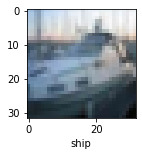

In [ ]:
plot_sample(X_test, y_test,2)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.9246060e-05, 3.3716532e-07, 1.5646844e-03, 5.1905960e-01,
        8.6314321e-05, 4.7515804e-01, 8.4590183e-06, 1.2763111e-04,
        3.9243195e-03, 1.4096952e-06],
       [9.8923175e-04, 1.1792643e-04, 6.4791617e-09, 1.3071626e-08,
        3.0160223e-09, 3.4292204e-11, 2.7562861e-15, 3.7428519e-11,
        9.9883586e-01, 5.6893277e-05],
       [1.6971581e-02, 1.8291472e-01, 5.8777764e-04, 2.4642083e-03,
        5.8758064e-06, 7.1858341e-04, 3.5663608e-05, 4.0816783e-04,
        2.9382804e-01, 5.0206536e-01],
       [9.9905020e-01, 1.4173650e-09, 1.4346301e-04, 2.1968162e-05,
        2.0509287e-04, 3.7885631e-08, 1.7864631e-06, 3.2024589e-06,
        5.7401188e-04, 1.5293659e-07],
       [6.1479298e-08, 1.2499100e-05, 1.1224110e-03, 3.1722239e-03,
        8.0428012e-02, 1.9089259e-03, 9.1335523e-01, 1.0446317e-07,
        4.2464140e-07, 1.2452050e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

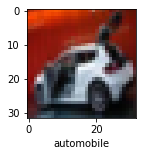

In [ ]:
plot_sample(X_test, y_test,6)

In [ ]:
classes[y_classes[1]]

'ship'

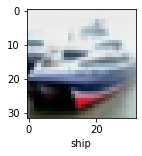

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1000
           1       0.87      0.78      0.82      1000
           2       0.72      0.53      0.61      1000
           3       0.51      0.52      0.51      1000
           4       0.68      0.70      0.69      1000
           5       0.55      0.68      0.61      1000
           6       0.80      0.77      0.78      1000
           7       0.70      0.79      0.74      1000
           8       0.81      0.82      0.82      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

